In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans #önceki derslerde supervised learning yaptık bu hafta kümeleme yapacağız

In [6]:
df = pd.read_csv("resources/resources/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape # 200 satır 5 sütun

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Figure size 1400x500 with 0 Axes>

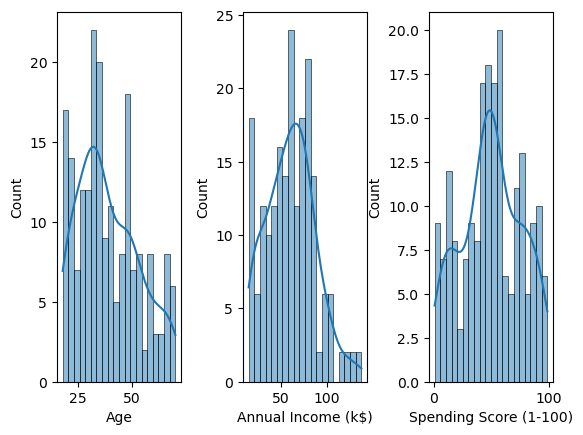

In [11]:
plt.figure(figsize=(14,5)) # 14 e 5 boyutunda 
fig, ax = plt.subplots(1,3) # 1 satırda 3 tane grafik göstereceğimizi gösteriyor 2 değer dönderiyor almayınca değer dönderiyor->fig
plt.subplots_adjust(hspace=0.5,wspace=0.5) # grafikler arası boşluk
y=0
for col in df.columns[2:]: # 2 den sonraki sütunların ismi
    sns.histplot(df[col],bins=20,kde=True,ax=ax[y]) #bin=histogram genişliği
    y+=1
#bu bize normal dağılım grafiğini veriyor ve verilerin normal dağıldığını gösteriyor    

<AxesSubplot:xlabel='count', ylabel='Gender'>

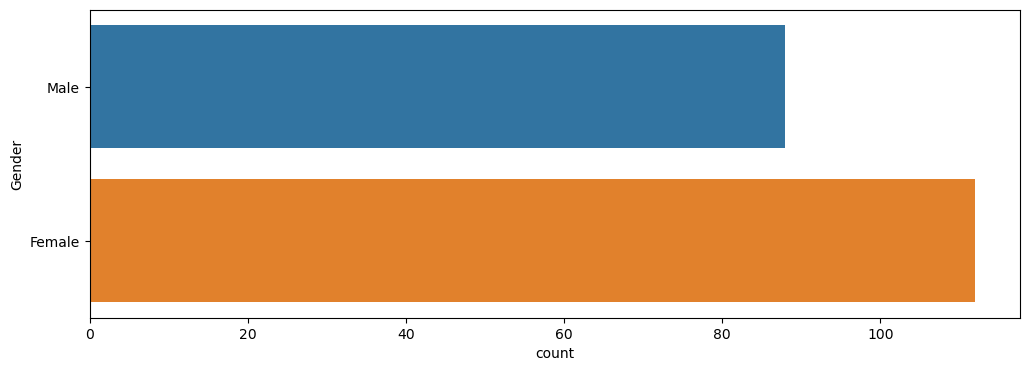

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,y="Gender")

<Figure size 2000x1000 with 0 Axes>

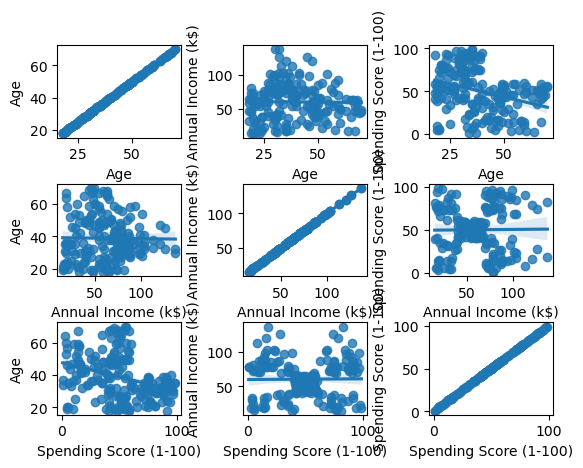

In [22]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
x= 0
for first in df.columns[2:]:
    y = 0
    for second in df.columns[2:]:
        sns.regplot(x = first, y = second, data=df, ax=ax[x, y])
        y += 1
    x += 1
#Regresyon grafiğini çizdirmek için

<AxesSubplot:>

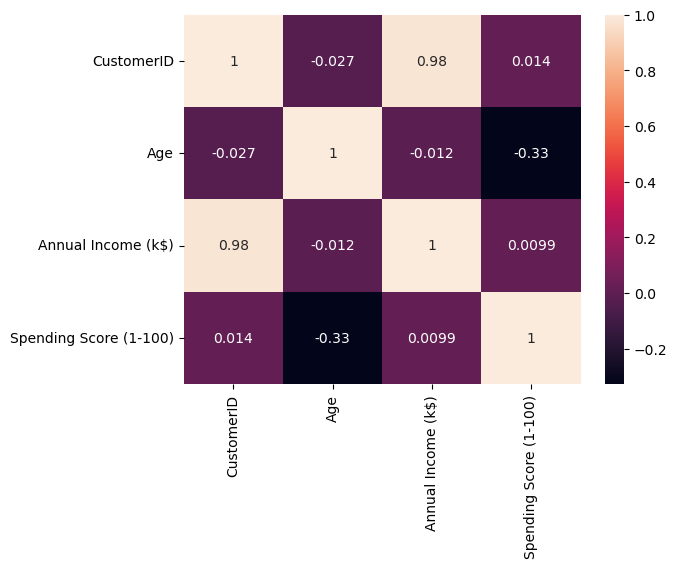

In [23]:
sns.heatmap(df.corr(),annot=True)
#Age Annual Income arasındaki ilişki schetter plot gendera göre renklendir yorum yap

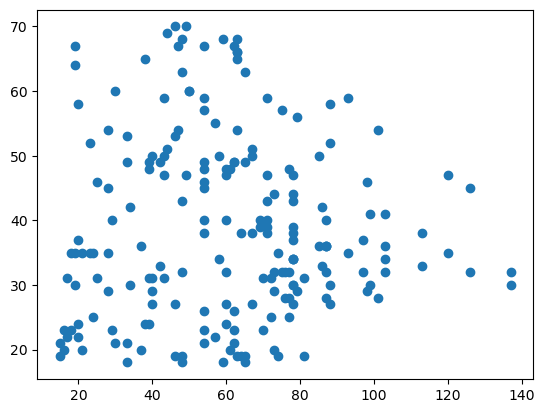

In [31]:
plt.scatter(x=df["Annual Income (k$)"],y=df["Age"])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

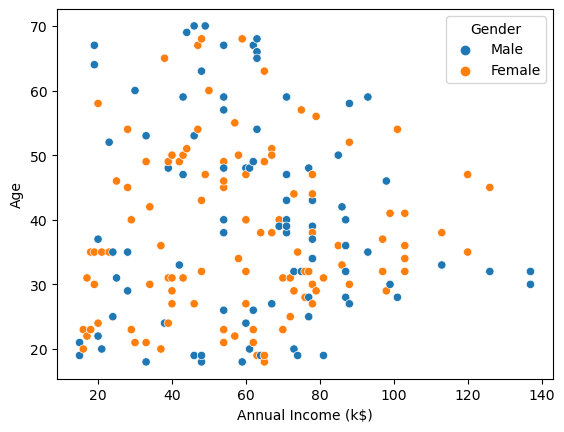

In [30]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Age",hue="Gender")

In [32]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
X =df[df.columns[2:]]
X
#unsupervised learning de y yok gruplara ayırma yok

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [1]:
#Kmeans algoritması kümeleme algoritmasını yerine getiriyor
uzaklik = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42)
    model.fit(X)
    uzaklik.append(model.inertia_)

NameError: name 'KMeans' is not defined

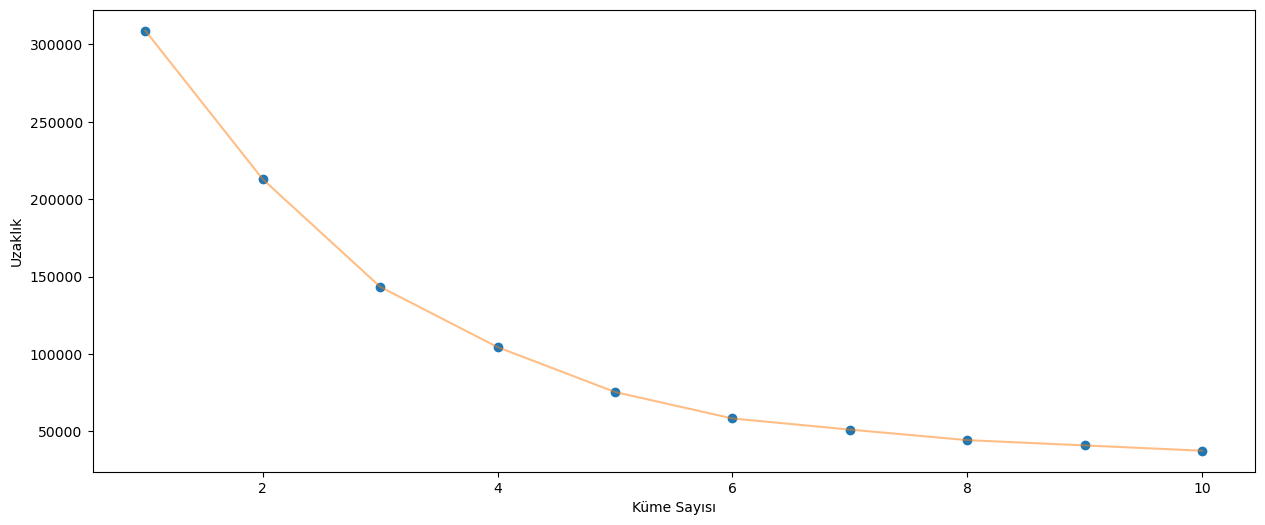

In [40]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , uzaklik , 'o')
plt.plot(np.arange(1 , 11) , uzaklik , '-' , alpha = 0.5)
plt.xlabel('Küme Sayısı') , plt.ylabel('Uzaklık')
plt.show()
#Dirsek yaptığı nokta 4 dür 4 kümeye ayırabiliriz

In [41]:
#hangi verinin hangi kümeye atandığını gösterir -> model.labels_

In [47]:
model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 42 , algorithm='elkan') )
model.fit(X)
new_labels = model.labels_
merkezler = model.cluster_centers_

In [48]:
new_labels

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [49]:
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

ValueError: X has 2 features, but KMeans is expecting 3 features as input.

In [50]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 17.  ,  14.  ],
       [ 17.02,  14.  ],
       [ 17.04,  14.  ],
       ...,
       [ 70.94, 137.98],
       [ 70.96, 137.98],
       [ 70.98, 137.98]])

In [45]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = new_labels , 
            s = 200 )
plt.scatter(x = merkezler[: , 0] , y =  merkezler[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()
# Windowsta hata veriyor sebebini bilmiyorum 

NameError: name 'Z' is not defined

<Figure size 1500x700 with 0 Axes>